## 1) IRIS DATASET

In [11]:
# Importing packages

import numpy as np
import math
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection  import train_test_split

In [12]:
# Reading the dataset

iris_dataset = pd.read_csv("iris.csv")
iris_dataset.columns = ['sepal_length','sepal_width','petal_length','petal_width','class_label']
iris_dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,class_label
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [13]:
# Splitting into class labels and attributes

attributes = iris_dataset.iloc[:, :-1].values
labels_names = iris_dataset.iloc[:, 4].values

# print(attributes)
# print(labels)

In [14]:
# Splitting into train and test (Stratified sampling)

X_train, X_test, y_train, y_test = train_test_split(attributes, labels_names, test_size = 0.2, stratify = labels_names)

In [6]:
# Checking the distribution of dataset

# print("Train_labels")
# print(y_train)
# print("Test Labels")
print(y_test)

['Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa']


In [7]:
# Scaling features



In [15]:
# Distance calculation

def euclidean_distance(item1, item2):
    d = 0.0
    for i in range(0, len(item1)):
        d = d + (abs(item1[i] - item2[i]))**2
    return math.sqrt(d)
# Can also return d itself instead of sqrt(d) as comparison is the same

# def distance(item1, item2):
#     item1 = np.array(item1)
#     item2 = np.array(item2)
#     return np.linalg.norm(item1-item2)

# print(distance(X_test[0], X_test[1]))

print(euclidean_distance(X_test[0], X_test[1]))


3.695943722515265


In [16]:
# k-Nearest Neighbor Implementation

def get_k_nearest_neighbor(k,trainSetAttributes, trainSetLabels, testingItem,distance):
    allDistances = []
    
    # Computing all distamces from a test instance     
    
    for index in range(0,len(trainSetAttributes)):
        d = distance(testingItem,trainSetAttributes[index])
        allDistances.append([d, trainSetAttributes[index], trainSetLabels[index]])

    allDistances.sort(key = lambda x : x[0])
    nearestNeighbors = allDistances[:k]
    
    # Getting majority voting  
    
    votes = {}
    for i in range(0,k):
        nearestLabel = nearestNeighbors[i][2]
        if nearestLabel in votes:
            votes[nearestLabel] += 1
        else:
            votes[nearestLabel] = 1
    voteCounts = list(votes.values())
    classes = list(votes.keys())
    predictedLabel = classes[voteCounts.index(max(voteCounts))]
    
    return (nearestNeighbors, predictedLabel)

In [7]:
# Example for an instance of test set

neighbors, predictedLabel = get_k_nearest_neighbor(5,X_train, y_train, X_test[0],euclidean_distance)
# print(neighbors)
print(predictedLabel)

Iris-versicolor


In [108]:
# a) Compare all four features distribution in each iris class using boxplots.
# Do we consider the entire dataset

setosa = iris_dataset.loc[iris_dataset['class_label'] == 'Iris-setosa']
# print(setosa)

versicolor = iris_dataset.loc[iris_dataset['class_label'] == 'Iris-versicolor']
# print(versicolor)

virginica = iris_dataset.loc[iris_dataset['class_label'] == 'Iris-virginica']
# print(virginica)

---SETOSA---


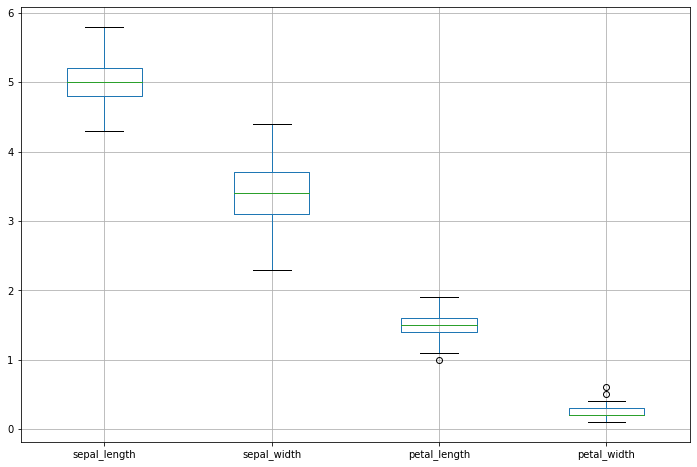

In [13]:
print("---SETOSA---")
P = plt.figure(figsize = (12,8))
P = setosa.boxplot()

---VERSICOLOR---


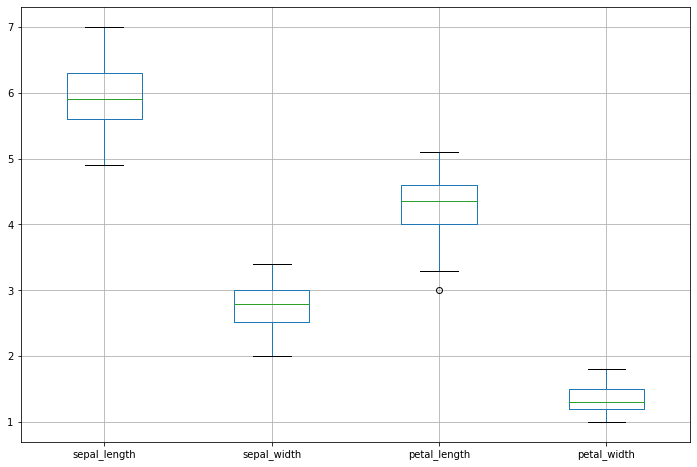

In [14]:
print("---VERSICOLOR---")
P = plt.figure(figsize = (12,8))
P = versicolor.boxplot()

---VIRGINICA---


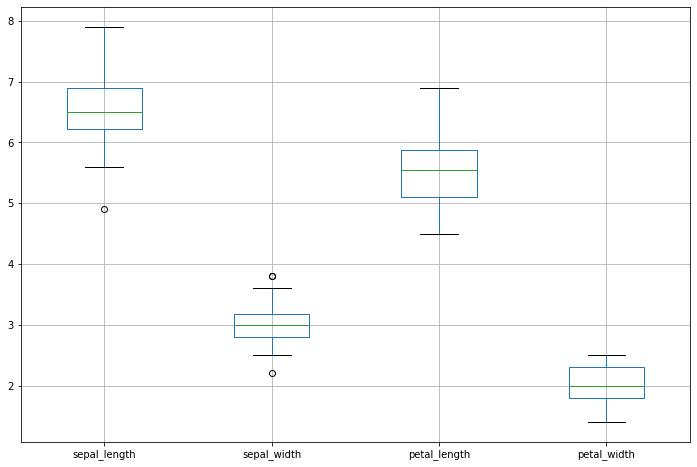

In [15]:
print("---VIRGINICA---")
P = plt.figure(figsize = (12,8))
P = virginica.boxplot()

In [59]:
# b) Start with k = 1, plot the decision boundary using the first two features (Sepal
# length and width)

cmap_light = colors.ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = colors.ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
step_size = 0.02

naming = {'sepal_length' : 0, 'sepal_width':1, 'petal_length': 2,'petal_width':3}

def getDecisionBoundary(feature1, feature2, k, distance):
    twoFeatures = iris_dataset.iloc[:, [feature1,feature2]].values
    labels = iris_dataset.iloc[:,4].values
    
    x_min, x_max = twoFeatures[:, 0].min() - 1, twoFeatures[:, 0].max() + 1
    y_min, y_max = twoFeatures[:, 1].min() - 1, twoFeatures[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size),np.arange(y_min, y_max, step_size))

    dataItems = np.c_[xx.ravel(), yy.ravel()]

    predictions = []

    for item in dataItems:
        neighbors, predictedLabel = get_k_nearest_neighbor(k,attributes, labels_names, item, distance)
        if(predictedLabel == 'Iris-setosa'):
            predictions.append(0)
        elif(predictedLabel == 'Iris-versicolor'):
            predictions.append(1)
        else:
            predictions.append(2)

    predictions = np.asarray(predictions)
    predictions = predictions.reshape(xx.shape)
    
    new_labels = []
    for label in labels:
        if(label == 'Iris-setosa'):
            new_labels.append(0)
        elif(label == 'Iris-versicolor'):
            new_labels.append(1)
        else:
            new_labels.append(2)

    plt.figure()
    plt.pcolormesh(xx, yy, predictions, cmap=cmap_light)

    plt.scatter(twoFeatures[:, 0], twoFeatures[:, 1], c=new_labels, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Decision boundary for k-value = {0}".format(k))

    plt.show()

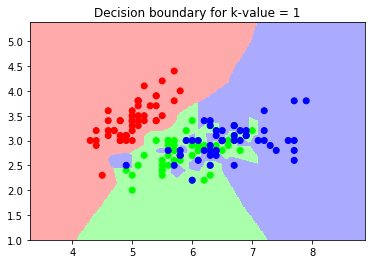

In [60]:
getDecisionBoundary(0, 1, 1, euclidean_distance)

In [118]:
# # To verify the boundaries with predefined model
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.colors import ListedColormap
# from sklearn import neighbors, datasets

# n_neighbors = 1

# # import some data to play with
# iris = datasets.load_iris()
# X = iris.data[:, :2]  # we only take the first two features. We could
#                       # avoid this ugly slicing by using a two-dim dataset
# y = iris.target

# h = .02  # step size in the mesh

# # Create color maps
# cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

# cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# # we create an instance of Neighbours Classifier and fit the data.
# clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
# clf.fit(X, y)

# # Plot the decision boundary. For that, we will assign a color to each
# # point in the mesh [x_min, x_max]x[y_min, y_max].
# x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
# y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                      np.arange(y_min, y_max, h))
# Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# # Put the result into a color plot
# Z = Z.reshape(xx.shape)
# plt.figure()
# plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# # Plot also the training points
# plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
# plt.xlim(xx.min(), xx.max())
# plt.ylim(yy.min(), yy.max())
# plt.title("3-Class classification (k = %i, weights = '%s')"
#           % (n_neighbors, weights))

# plt.show()

# getDecisionBoundary(0, 1, 1, euclidean_distance)

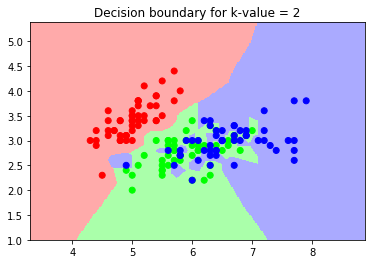

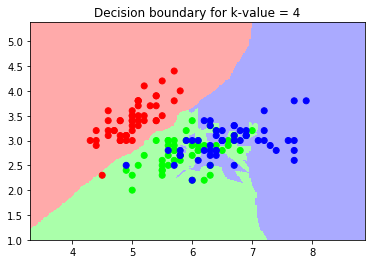

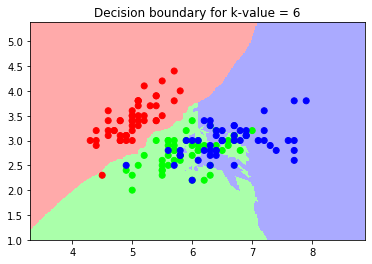

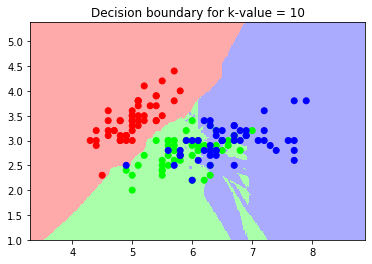

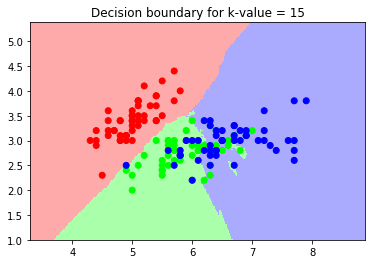

In [113]:
# (c) Perform the prediction using k = 2, 4, 6, 10, 15 and plot the decision boundaries.
# How does the decision boundary change by increasing the number of neighbors?

k_values = [2,4,6,10,15]

for k in k_values:
    getDecisionBoundary(0, 1, k, euclidean_distance)

#### Effect of k-value on decision boundaries

For k-NN, the decision boundary is based on the value of k selected. As the k value decreases, the number of granulated desicions increases and thus the boundary between different classes becomes more and more complex.
For k = 1,2,4 the decision boundary is very granulated

However, if k values is sufficiently large, it results in smooth boundaries thereby making the decisions easy to understand. The larger the k, the smoother is the decision boundary. 
For k = 6,10,15 the decision boundary is a little smooth compared to other valued boundaries.

In [117]:
# # To verify the boundaries with predefined model
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.colors import ListedColormap
# from sklearn import neighbors, datasets

# n_neighbors = [2,4,6,10,15]

# # import some data to play with
# iris = datasets.load_iris()
# X = iris.data[:, :2]  # we only take the first two features. We could
#                       # avoid this ugly slicing by using a two-dim dataset
# y = iris.target

# h = .02  # step size in the mesh

# # Create color maps
# cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

# cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
# for k in n_neighbors:
    
#     # we create an instance of Neighbours Classifier and fit the data.
#     clf = neighbors.KNeighborsClassifier(k, weights=weights)
#     clf.fit(X, y)

#     # Plot the decision boundary. For that, we will assign a color to each
#     # point in the mesh [x_min, x_max]x[y_min, y_max].
#     x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#     y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                          np.arange(y_min, y_max, h))
#     Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

#     # Put the result into a color plot
#     Z = Z.reshape(xx.shape)
#     plt.figure()
#     plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

#     # Plot also the training points
#     plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
#     plt.xlim(xx.min(), xx.max())
#     plt.ylim(yy.min(), yy.max())

#     plt.show()

In [17]:
# (d) Use a new distance measure L3 (Minkowski formula for p = 3), and redo the
# previous step. How does changing the distance function affect the classification?

def minkowski_distance(item1, item2):
    d = 0.0
    for i in range(0, len(item1)):
        d = d + (abs(item1[i] - item2[i]))**3
    return math.pow(d,1/3)

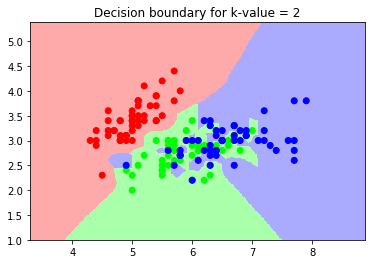

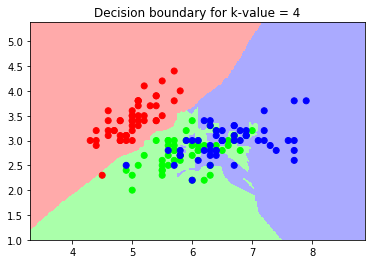

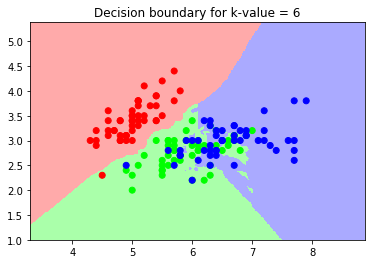

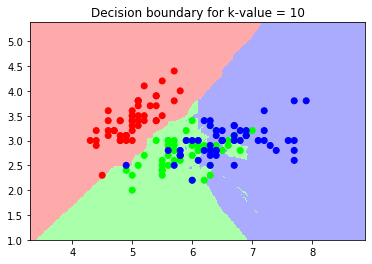

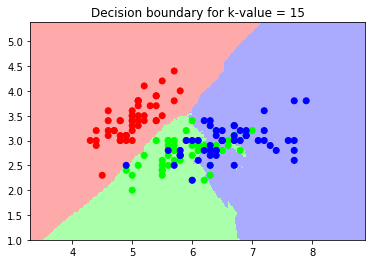

In [135]:
k_values = [2,4,6,10,15]

for k in k_values:
    getDecisionBoundary(0, 1, k, minkowski_distance)

#### Effect of distance metric on kNN classification

For lower values of k i.e., 2, 4, there is no much difference using Euclidean or Minkowski distance. 

Minkowski distance gives a more stable boundaries and less effected by noise when compared to Euclidean distance.

In [18]:
# (e) For all cases, report accuracy

def compute_accuracy(predicted_labels, actual_labels):
    count = 0
    for i in range(0,len(predicted_labels)):
        if(predicted_labels[i] == actual_labels[i]):
            count += 1
    
    accuracy = (count / len(predicted_labels))*100
    return accuracy

Accuracies for Euclidean Distance metric
----------------------------------------
For k = 2
96.66666666666667 %
For k = 4
96.66666666666667 %
For k = 6
96.66666666666667 %
For k = 10
100.0 %
For k = 15
96.66666666666667 %


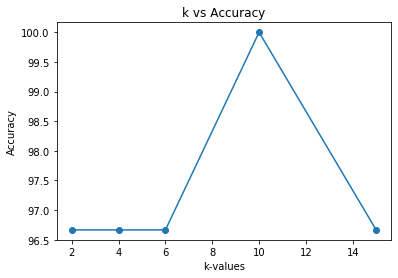

In [21]:
# Using Euclidean distance

print("Accuracies for Euclidean Distance metric")
print("----------------------------------------")

acc_list = []
k_list = [2,4,6,10,15]

for k in k_list:
    prediction = []
    for item in X_test:
        neighbors, predictedLabel = get_k_nearest_neighbor(k,X_train, y_train, item,euclidean_distance)
        prediction.append(predictedLabel)
    print("For k = {0}".format(k))
    acc = compute_accuracy(prediction, y_test)
    print("{0} %".format(acc))
    
    acc_list.append(acc)
plt.figure()
plt.plot(k_list, acc_list, marker = "o")  

plt.xlabel("k-values")
plt.ylabel("Accuracy")
plt.title("k vs Accuracy")

plt.show()

Accuracies for Minkowski Distance metric
----------------------------------------
For k = 2
96.66666666666667 %
For k = 4
96.66666666666667 %
For k = 6
96.66666666666667 %
For k = 10
100.0 %
For k = 15
100.0 %


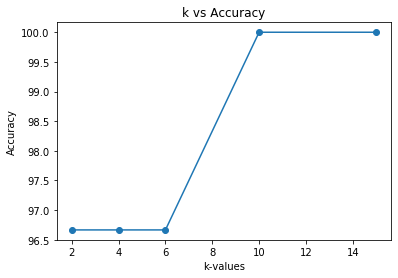

In [20]:
# Using Minkowski distance

print("Accuracies for Minkowski Distance metric")
print("----------------------------------------")

acc_list = []
k_list = [2,4,6,10,15]

for k in k_list:
    prediction = []
    for item in X_test:
        neighbors, predictedLabel = get_k_nearest_neighbor(k,X_train, y_train, item,minkowski_distance)
        prediction.append(predictedLabel)
    print("For k = {0}".format(k))
    acc = compute_accuracy(prediction, y_test)
    print("{0} %".format(acc))
    
    acc_list.append(acc)

plt.figure()
plt.plot(k_list, acc_list, marker = "o")  

plt.xlabel("k-values")
plt.ylabel("Accuracy")
plt.title("k vs Accuracy")

plt.show()

## 2) MNIST DATASET

In [9]:
# Importing packages

import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection  import train_test_split

In [10]:
# Reading the training dataset

training_data = pd.read_csv("mnist_train.csv", header = None)

# X_train = training_data.iloc[:,1:].values
# y_train = training_data.iloc[:,0].values
# print(y_train.shape)

In [11]:
# Reading the testing dataset

testing_data = pd.read_csv("mnist_test.csv", header = None)

# X_test = testing_data.iloc[:,1:].values
# y_test = testing_data.iloc[:,0].values
# print(y_test.shape)

In [57]:
training_samples = [500, 1000, 2500, 5000, 10000, 30000, 60000]
testingSampleSize = 1000
k = 2
# training_samples = [5, 10, 15, 20, 25, 30, 35]
# testingSampleSize = 10

data_sample = testing_data.sample(testingSampleSize)
X_test = data_sample.iloc[:,1:].values
y_test = data_sample.iloc[:,0].values

all_predictions = []
csfErr = []

for trainingSampleSize in training_samples:
    data_sample = training_data.sample(trainingSampleSize)
    
    X_train = data_sample.iloc[:,1:].values
    y_train = data_sample.iloc[:,0].values
    
    print("For training data size {0}".format(trainingSampleSize))
    predictions = []
    for item in X_test:
        predictedLabel = get_k_nearest_neighbor(k,X_train, y_train, item,euclidean_distance)[1]
        predictions.append(predictedLabel)
    print("Predicted Labels {0}".format(predictions))
    error = 0
    for i in range(0, len(predictions)):
        if(predictions[i] != y_test[i]):
            error += 1
    classificationError = (error/len(predictions))*100
    print(classificationError)
    csfErr.append(classificationError)
    all_predictions.append(predictions)

print("Classification Error {0}".format(csfErr))
print(csfErr)

For training data size 500
Predicted Labels [7, 0, 0, 4, 7, 1, 7, 5, 8, 1, 7, 4, 7, 1, 4, 0, 1, 6, 6, 6, 1, 1, 0, 9, 8, 5, 1, 4, 9, 0, 9, 9, 0, 5, 1, 7, 3, 6, 7, 8, 1, 2, 8, 4, 1, 3, 2, 0, 9, 4, 7, 5, 9, 3, 8, 1, 7, 8, 8, 1, 6, 1, 3, 7, 7, 5, 1, 1, 0, 0, 1, 1, 3, 4, 1, 6, 2, 4, 0, 5, 2, 2, 0, 0, 8, 8, 0, 6, 3, 5, 0, 5, 6, 6, 7, 5, 9, 4, 5, 1, 6, 6, 0, 7, 5, 5, 9, 7, 5, 5, 8, 6, 7, 7, 4, 7, 1, 4, 7, 8, 9, 9, 2, 1, 0, 6, 1, 8, 1, 6, 7, 1, 1, 0, 8, 8, 5, 7, 5, 3, 1, 0, 6, 2, 6, 1, 9, 7, 3, 8, 9, 7, 0, 7, 9, 3, 8, 2, 6, 0, 7, 3, 6, 6, 1, 3, 7, 7, 8, 3, 0, 7, 9, 3, 2, 2, 1, 5, 1, 7, 9, 9, 1, 8, 3, 5, 7, 6, 5, 6, 6, 0, 6, 4, 0, 7, 8, 1, 9, 8, 4, 7, 0, 4, 2, 0, 8, 2, 0, 6, 9, 1, 1, 1, 8, 9, 1, 1, 3, 6, 6, 3, 3, 2, 8, 1, 5, 5, 4, 9, 5, 4, 9, 1, 1, 0, 1, 2, 1, 7, 4, 5, 0, 2, 3, 4, 5, 7, 9, 8, 0, 4, 2, 2, 0, 2, 0, 6, 3, 4, 8, 4, 0, 9, 2, 3, 9, 7, 8, 1, 5, 1, 8, 9, 8, 3, 1, 7, 0, 0, 9, 6, 1, 7, 7, 0, 0, 0, 1, 7, 5, 2, 7, 3, 2, 4, 5, 7, 6, 0, 1, 6, 6, 7, 7, 7, 6, 5, 1, 5, 1, 1, 7, 2, 1, 0, 7, 4, 0

KeyboardInterrupt: 

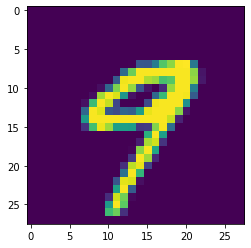

In [16]:
plt.imshow(X_train[21].reshape((28,28)))

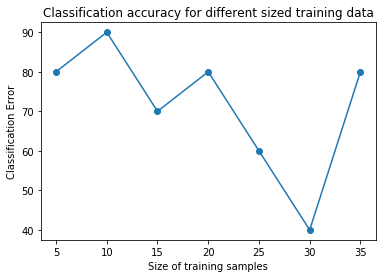

In [22]:
plt.figure()
plt.plot(training_samples, csfErr, marker = "o")  

plt.xlabel("Size of training samples")
plt.ylabel("Classification Error")
plt.title("Classification accuracy for different sized training data")

plt.show()

[0, 5, 1, 2, 1, 5, 9, 9, 8, 5]
[5, 3, 1, 2, 1, 3, 9, 9, 8, 6]
Confusion Matrix
----------------
[[0 0 0 0 1 0 0 0]
 [0 2 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 2 0 1 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 2]]
Accuracy score 0.6
Report               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         0
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         2

    accuracy                           0.60        10
   macro avg       0.50      0.50      0.50        10
weighted avg       0.60      0.60      0.60        10



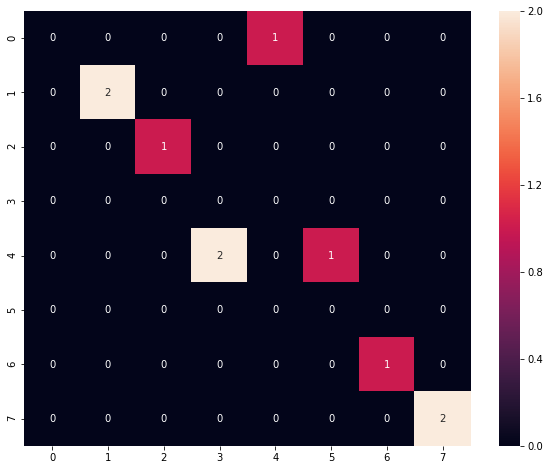

In [52]:
# (b) What is the confusion matrix of the best test?
# The best test is the one with low error rate

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
import seaborn as sns

low_error_index = csfErr.index(min(csfErr))

results = confusion_matrix(y_test, all_predictions[low_error_index]) 
y_test = y_test.tolist()

print(y_test)
print(all_predictions[low_error_index])
    
print ("Confusion Matrix")
print("----------------")
print(results) 
acc_score = accuracy_score(y_test, all_predictions[low_error_index])
print("Accuracy score {0}".format(acc_score))
report = classification_report(y_test, all_predictions[low_error_index])
print("Report {0}".format(report))
plt.subplots(figsize=(10,8))
ax = sns.heatmap(results, annot=True)

bottom, top = ax.get_ylim()
ax = ax.set_ylim(bottom + 0.5, top - 0.5)

In [55]:
# (c) Change the majority based voting with a method of your choosing. How does it
# affect the error rate using half of the training examples?

# Predicted class is the one mid to all nearest neighbor distances in the test example

def get_kNN(k,trainSetAttributes, trainSetLabels, testingItem,distance):
    allDistances = []
    
    # Computing all distamces from a test instance     
    
    for index in range(0,len(trainSetAttributes)):
        d = distance(testingItem,trainSetAttributes[index])
        allDistances.append([d, trainSetAttributes[index], trainSetLabels[index]])

    allDistances.sort(key = lambda x : x[0])
    nearestNeighbors = allDistances[:k]
    
    # Majority voting changed to nearest class 
    
    return (nearestNeighbors[int(k/2)],nearestNeighbors[int(k/2)][2])

In [56]:
data = training_data.sample(30000)
X_train = data.iloc[:,1:].values
y_train = data.iloc[:,0].values
predictions = []
for item in X_test:
    predictedLabel = get_kNN(k,X_train, y_train, item,euclidean_distance)[1]
    predictions.append(predictedLabel)
print("Predicted Labels {0}".format(predictions))
error = 0
for i in range(0, len(predictions)):
    if(predictions[i] != y_test[i]):
        error += 1
classificationError = (error/len(predictions))*100
print("Classification Error is {0}".format(classificationError))

KeyboardInterrupt: 

#### Effect on error rate by changing the majority based voting

The majority based voting is changed to taking the class label that is at (k/2)th position when the distances are sorted in ascending order.

The error rate is observed to //////////